In [2]:
%matplotlib inline
from QuantLib import *
import numpy as np
import matplotlib.pyplot as plt

Settings.instance().evaluationDate = Date(3, October, 2014)

helpers = [ SwapRateHelper(QuoteHandle(SimpleQuote(rate/100.0)),
	Period(*tenor), TARGET(), Annual, Unadjusted, Thirty360(), Euribor6M())
for tenor, rate in [((2,Years), 0.201), ((3,Years), 0.258), ((5,Years), 0.464),
	((10,Years), 1.151), ((15,Years), 1.588)] ]

curve1 = PiecewiseFlatForward(0, TARGET(), helpers, Actual360())

dates, rates = zip(*curve1.nodes())
print(curve1.nodes())


((Date(3,10,2014), 0.001977769487929318), (Date(7,10,2016), 0.001977769487929318), (Date(9,10,2017), 0.0036475517704511913), (Date(7,10,2019), 0.007660760701876774), (Date(7,10,2024), 0.01841477366942081), (Date(8,10,2029), 0.025311634328221526))


In [3]:
curve2 = ForwardCurve(dates, rates, Actual360())
print("{0} to {1}".format(curve1.referenceDate(), curve1.maxDate()))
print("{0} to {1}".format(curve2.referenceDate(), curve2.maxDate()))

print(curve1.zeroRate(5.0, Continuous))
print(curve2.zeroRate(5.0, Continuous))

print(curve1.zeroRate(Date(7, September, 2019), Actual360(), Continuous))
print(curve2.zeroRate(Date(7, September, 2019), Actual360(), Continuous))


October 3rd, 2014 to October 8th, 2029
October 3rd, 2014 to October 8th, 2029
0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


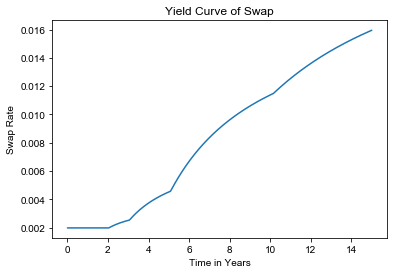

In [4]:
times = np.linspace(0.0, 15.0, 400)
rates = [ curve1.zeroRate(t, Continuous).rate() for t in times ]

fig = plt.figure()
plt.title("Yield Curve of Swap")
plt.xlabel("Time in Years")
plt.ylabel("Swap Rate")
plt.style.use('seaborn-whitegrid')

plt.plot(times, rates);
plt.show()
